# Final Project: Statistical Analysis of Student Performance

## Project Scenario

You are a teacher conducting a study on factors influencing student performance in exams. You have obtained the "Student Performance" dataset from Kaggle, which contains information about students' demographics and their scores in different subjects. Your task is to analyze the data, identify patterns, and draw conclusions about factors affecting student performance.

Dataset Link: [Student Performance Dataset](https://www.kaggle.com/spscientist/students-performance-in-exams)

## Instructions

You are required to perform the following analyses and answer the questions using the data provided.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
data = pd.read_csv('StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# 1. Basic Statistical Analysis
Calculate the mean and standard deviation for the math score, reading score, and writing score columns.

In [3]:
# Calculate mean
math_mean = data["math score"].mean()
reading_mean = data['reading score'].mean()
writing_mean = data['writing score'].mean()

# # # Calculate standard deviation
math_std = data['math score'].std()
reading_std = data['reading score'].std()
writing_std = data['writing score'].std()

print(f"Mean Math Score: {math_mean}, Std: {math_std}")
print(f"Mean Reading Score: {reading_mean}, Std: {reading_std}")
print(f"Mean Writing Score: {writing_mean}, Std: {writing_std}")

Mean Math Score: 66.089, Std: 15.16308009600945
Mean Reading Score: 69.169, Std: 14.600191937252216
Mean Writing Score: 68.054, Std: 15.19565701086965


# 2. Probabilities

Calculate the probability that a student is Male or has a Math_Score above 80.

In [4]:
# Calculate probabilities
p_male =  data['gender'].value_counts().get('male', 0) / data['gender'].count()
p_math_above_80 = (data['math score'] > 80).sum() / data ['math score'].count()
p_male_and_math_above_80 = p_male * p_math_above_80

# # # Union probability
p_union = p_male + p_math_above_80 - p_male_and_math_above_80
print(f"Probability of Male or Math Score > 80: {p_union}")
print(p_male)

Probability of Male or Math Score > 80: 0.5731679999999999
0.482


Calculate the probability that a student is Male and has a Math_Score above 80.

In [5]:
# Calculate probabilities
p_male = data['gender'].value_counts().get('male', 0) / data['gender'].count()
p_math_above_80 = (data['math score'] > 80).sum() / data ['math score'].count()
p_male_and_math_above_80 = p_male * p_math_above_80

# Union probability
p_intersection = p_male_and_math_above_80
print(f"Probability of Male and Math Score > 80: {p_intersection}")

Probability of Male and Math Score > 80: 0.08483199999999999


### Bayes' Theorem
Calculate the probability that a student is Male given they have a Math_Score above 80.

In [6]:
# Calculate conditional probability using Bayes' theorem
p_male_given_math_above_80 =  ((data['gender'] == 'male') & (data['math score'] > 80)).sum()/  (data['math score'] > 80).sum()
print(f"Probability of Male given Math Score > 80: {p_male_given_math_above_80}")

Probability of Male given Math Score > 80: 0.6136363636363636


# 3. Normal Distribution
Check Normality
Use QQ plot, histogram, and Shapiro-Wilk test to check if Math_Score is normally distributed.

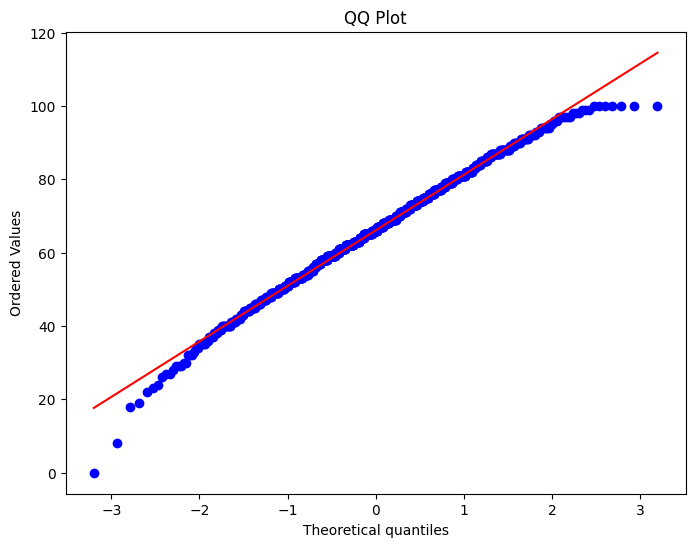

In [7]:
# QQ plot
plt.figure(figsize=(8, 6))
stats.probplot(data['math score'], dist="norm", plot=plt)
plt.title('QQ Plot')
plt.show()



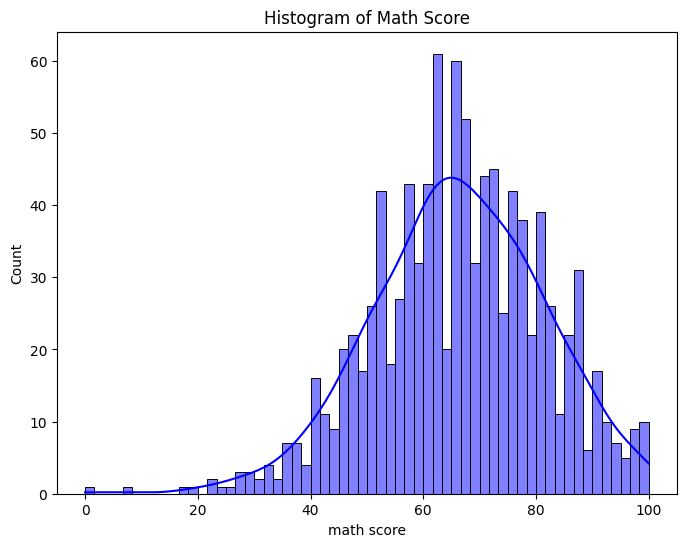

In [8]:
# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(data['math score'],  kde=True ,bins=60, color='blue', edgecolor='black')
plt.title('Histogram of Math Score')
plt.show()

In [9]:
# Shapiro-Wilk test

statistic, p_value = stats.shapiro(data['math score'])
print(f"Shapiro-Wilk Test for Math Score: Statistic = {statistic}, p-value = {p_value}")


# Interpretation
alpha = 0.05
if p_value < alpha:
    print("the data is not normally distributed" )
else:
    print("the data is normally distributed")

Shapiro-Wilk Test for Math Score: Statistic = 0.9931513872437832, p-value = 0.00014545719606603633
the data is not normally distributed


# 4. Z-Score and Noise Removal

Calculate the z-scores for the Math_Score column and remove noise (more than 95%).


In [10]:
# Calculate z-scores
data['Math_Score_z'] = (data['math score'] - data['math score'].mean()) / data['math score'].std()

# # Remove noise
mu=data['Math_Score_z'].mean()
sd=data['Math_Score_z'].std()
z=mu+2*sd
cleaned_data = data[(data['Math_Score_z'] >= -z) & (data['Math_Score_z'] <= z)]
print(f"Original data size: {data.shape}")
print(f"Cleaned data size: {cleaned_data.shape}")

Original data size: (1000, 9)
Cleaned data size: (954, 9)


# 5. Visualizations
Generate different plots (box, histogram, scatter, pie) to visualize Math Score column before and after removing noise.

Text(0.5, 1.0, 'Box Plot of Math_Score (After)')

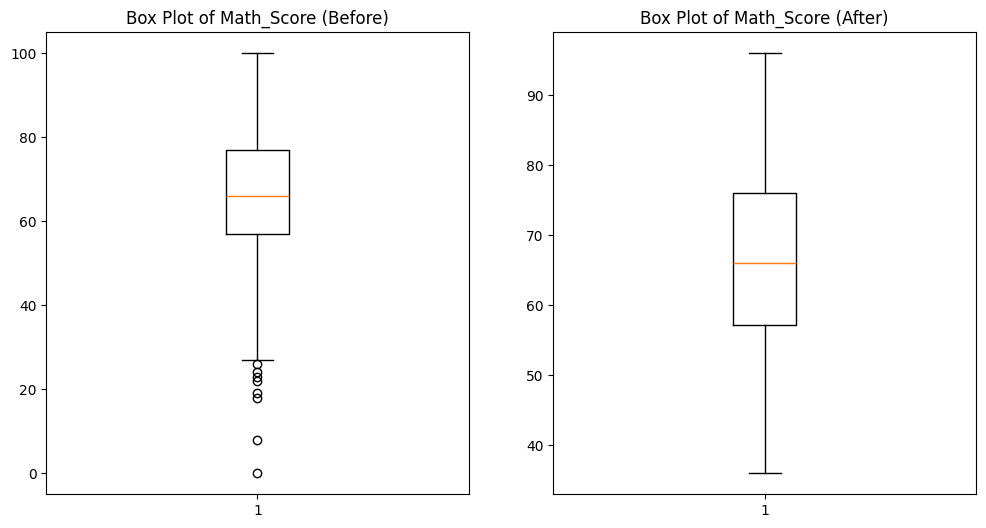

In [11]:
# Box plot

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.boxplot(data['math score'])
plt.title('Box Plot of Math_Score (Before)')


plt.subplot(1, 2, 2)
plt.boxplot(cleaned_data['math score'])
plt.title('Box Plot of Math_Score (After)')



Text(0.5, 1.0, 'Histogram of Math_Score (After)')

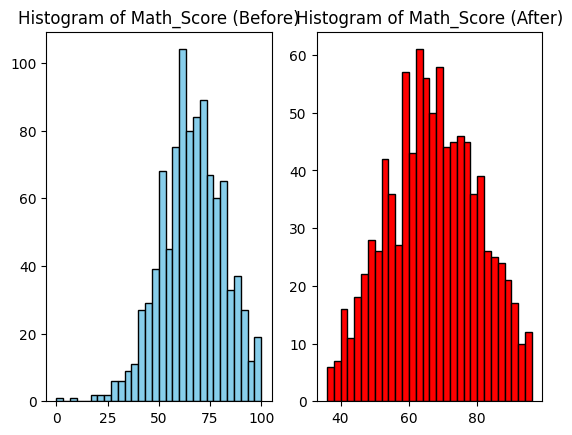

In [12]:
# Histogram

plt.subplot(1, 2, 1)
plt.hist(data['math score'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Math_Score (Before)')

plt.subplot(1, 2, 2)
plt.hist(cleaned_data['math score'], bins=30, color='red', edgecolor='black')
plt.title('Histogram of Math_Score (After)')


Text(0.5, 1.0, 'Scatter Plot of Math_Score (After)')

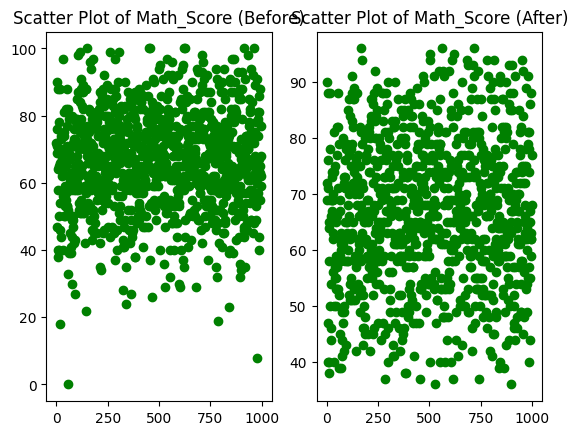

In [13]:
# Scatter plot

plt.subplot(1, 2, 1)
plt.scatter(data.index, data['math score'], color='green')
plt.title('Scatter Plot of Math_Score (Before)')


plt.subplot(1, 2, 2)
plt.scatter(cleaned_data.index, cleaned_data['math score'], color='green')
plt.title('Scatter Plot of Math_Score (After)')


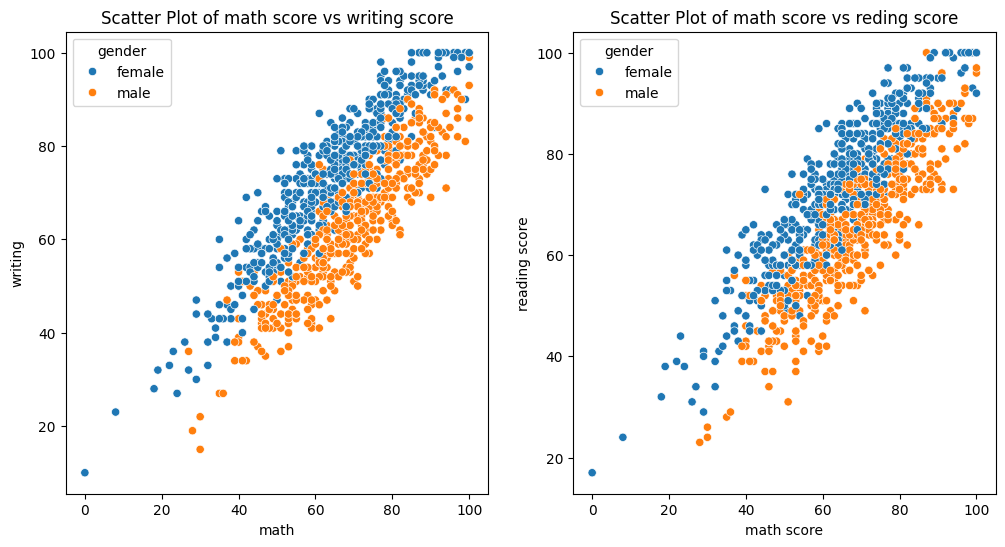

In [14]:
#scater plot
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
sns.scatterplot(x='math score', y='writing score' , data=data , hue='gender') #use hue just to show gender differnts and beuty
plt.title('Scatter Plot of math score vs writing score')
plt.xlabel('math')
plt.ylabel('writing')

plt.subplot(1,2,2)
sns.scatterplot(x='math score', y='reading score' , data=data, hue='gender')
plt.title('Scatter Plot of math score vs reding score')
plt.xlabel('math score')
plt.ylabel('reading score')
plt.show()

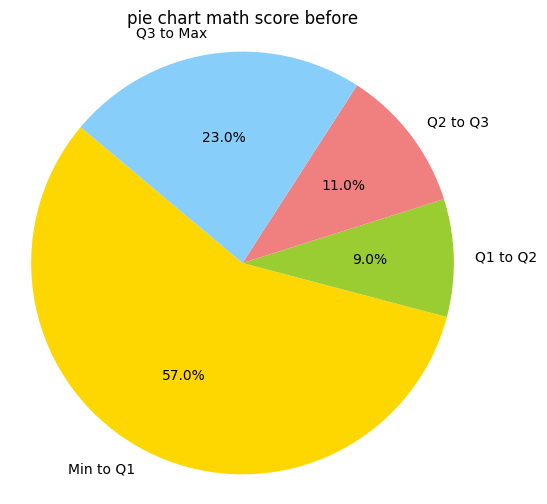

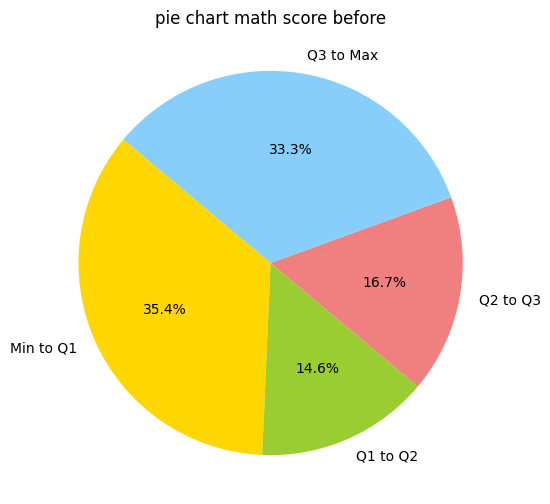

In [15]:
# Pie chart math score before


# Calculate quartiles and min/max
q1, q2, q3 = np.percentile(data['math score'], [25, 50, 75])
data_min, data_max = np.min(data['math score']), np.max(data['math score'])

# Calculate the sizes for each range
sizes = [q1 - data_min, q2 - q1, q3 - q2, data_max - q3]
labels = ['Min to Q1', 'Q1 to Q2', 'Q2 to Q3', 'Q3 to Max']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('pie chart math score before')
plt.axis('equal')  


#pie chart math score after

# Calculate quartiles and min/max
q1, q2, q3 = np.percentile(cleaned_data['math score'], [25, 50, 75])
data_min, data_max = np.min(cleaned_data['math score']), np.max(cleaned_data['math score'])

# Calculate the sizes for each range
sizes = [q1 - data_min, q2 - q1, q3 - q2, data_max - q3]
labels = ['Min to Q1', 'Q1 to Q2', 'Q2 to Q3', 'Q3 to Max']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

# Plot the pie chart
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('pie chart math score before')
plt.axis('equal') 
 
plt.show()

# 6. Parametric Hypothesis Testing

### Two samples
Perform a two-sample hypothesis test to compare the Math_Score between Male and Female students. (use cleaned data and choose  appropriate test)

In [16]:
male_math_score = cleaned_data[cleaned_data['gender'] == 'male']['math score']
female_math_score = cleaned_data[cleaned_data['gender'] == 'female']['math score']

t_statistic, p_value = stats.ttest_ind(male_math_score, female_math_score)
print(f"T-statistic: {t_statistic}, p-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("there is a statistically significant difference in math scores between male and female students")
else:
    print( "there is not a statistically significant difference in math scores between male and female students")

T-statistic: 4.384844297739353, p-value: 1.2899664913401746e-05
there is a statistically significant difference in math scores between male and female students


### 3 Samples or More
Perform an hypothesis test to compare the Math_Score across different ethnicities.

In [17]:
from scipy.stats import f_oneway
grouped_data = [data['math score'][data['race/ethnicity'] == group] for group in data['race/ethnicity'].unique()]
f_statistic, p_value = f_oneway(*grouped_data)

print("F-statistic:", f_statistic)
print("P-value:", p_value)


# Interpretation
alpha = 0.05
if p_value < alpha:
    print( 'The differences in Math_Scores between ethnicities are statistically significant.')
else:
    print( "There is no statistically significant difference in Math_Scores between ethnicities.")


F-statistic: 14.593885166332637
P-value: 1.3732194030370688e-11
The differences in Math_Scores between ethnicities are statistically significant.


# 7. Confidence Interval

Calculate a 95% confidence interval for the mean Math_Score.

In [18]:
n = len(cleaned_data)
math_std = cleaned_data['math score'].std()
math_mean = cleaned_data["math score"].mean()
confidence_level = .95
z = stats.norm.ppf(1 - (1 - confidence_level) / 2)
standard_error = math_std / np.sqrt(n)
lower_bound = math_mean - z * standard_error
upper_bound = math_mean + z * standard_error
confidence_interval = (lower_bound, upper_bound)

print(f"95% Confidence interval for mean Math Score: {confidence_interval}")

95% Confidence interval for mean Math Score: (65.69500030072132, 67.3762785252745)
